In [5]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy  # para índice de Shannon (diversidade)

In [6]:
# Configurações visuais
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
sns.set(style="whitegrid")

In [25]:
# Apresentação dos dados
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

In [ ]:
caminho_arquivo = "data/raw/bq_2022.csv"
df = pd.read_csv(caminho_arquivo)
df.head()

,id_municipio,nome_municipio,sigla_uf,cor_raca,populacao_homens,populacao_mulheres,populacao_total
0,1100015,Alta Floresta D'Oeste,RO,Amarela,1654,1544,3198
1,1100015,Alta Floresta D'Oeste,RO,Branca,1654,1544,3198
2,1100015,Alta Floresta D'Oeste,RO,Indígena,1654,1544,3198
3,1100015,Alta Floresta D'Oeste,RO,Parda,1654,1544,3198
4,1100015,Alta Floresta D'Oeste,RO,Preta,1654,1544,3198


In [ ]:
# Inspeção rápida
print(df.shape)
print(df.columns.tolist())
print(df.dtypes)
df.isna().sum()

(27850, 7)
['id_municipio', 'nome_municipio', 'sigla_uf', 'cor_raca', 'populacao_homens', 'populacao_mulheres', 'populacao_total']
id_municipio           int64
nome_municipio        object
sigla_uf              object
cor_raca              object
populacao_homens       int64
populacao_mulheres     int64
populacao_total        int64
dtype: object


id_municipio          0
nome_municipio        0
sigla_uf              0
cor_raca              0
populacao_homens      0
populacao_mulheres    0
populacao_total       0
dtype: int64

In [ ]:
# Preparação dos dados
# Trim nomes e valores categóricos
df['cor_raca'] = df['cor_raca'].astype(str).str.strip().str.title()
df['nome_municipio'] = df['nome_municipio'].astype(str).str.strip()
df['sigla_uf'] = df['sigla_uf'].astype(str).str.strip().str.upper()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27850 entries, 0 to 27849
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_municipio        27850 non-null  int64 
 1   nome_municipio      27850 non-null  object
 2   sigla_uf            27850 non-null  object
 3   cor_raca            27850 non-null  object
 4   populacao_homens    27850 non-null  int64 
 5   populacao_mulheres  27850 non-null  int64 
 6   populacao_total     27850 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.5+ MB


In [ ]:
# Verificação da Estrutura esperada: uma linha por município x cor_raca
counts = df.groupby('id_municipio').size().describe()
print("Linhas por município (descrição):\n", counts)

Linhas por município (descrição):
 count    5570.0
mean        5.0
std         0.0
min         5.0
25%         5.0
50%         5.0
75%         5.0
max         5.0
dtype: float64


In [26]:
# Padronizar nomes
df1 = df.rename(columns=lambda c: c.strip().lower())

# Lista oficial das capitais + DF
capitais = {
    "Rio Branco": "AC",
    "Maceió": "AL",
    "Macapá": "AP",
    "Manaus": "AM",
    "Salvador": "BA",
    "Fortaleza": "CE",
    "Brasília": "DF",
    "Vitória": "ES",
    "Goiânia": "GO",
    "São Luís": "MA",
    "Cuiabá": "MT",
    "Campo Grande": "MS",
    "Belo Horizonte": "MG",
    "Belém": "PA",
    "João Pessoa": "PB",
    "Curitiba": "PR",
    "Recife": "PE",
    "Teresina": "PI",
    "Rio de Janeiro": "RJ",
    "Natal": "RN",
    "Porto Alegre": "RS",
    "Porto Velho": "RO",
    "Boa Vista": "RR",
    "Florianópolis": "SC",
    "São Paulo": "SP",
    "Aracaju": "SE",
    "Palmas": "TO",
}

# Filtrar apenas capitais
df_capitais = df1[
    (df1['nome_municipio'].isin(capitais.keys())) &
    (df1['sigla_uf'].isin(capitais.values()))
]

# Selecionar colunas pedidas
df_capitais = df_capitais[['id_municipio', 'nome_municipio', 'sigla_uf']].drop_duplicates()

df_capitais

,id_municipio,nome_municipio,sigla_uf
80,1100205,Porto Velho,RO
330,1200401,Rio Branco,AC
555,1302603,Manaus,AM
690,1400100,Boa Vista,RR
845,1501402,Belém,PA
1515,1600303,Macapá,AP
2215,1721000,Palmas,TO
3175,2111300,São Luís,MA
4410,2211001,Teresina,PI
4745,2304400,Fortaleza,CE


In [ ]:
#Agregados nacionais por raça (população masculina)
agg_raca = df.groupby('cor_raca')['populacao_homens'].sum().reset_index().sort_values('populacao_homens', ascending=False)
agg_raca['pct_sobre_homens_total'] = agg_raca['populacao_homens'] / agg_raca['populacao_homens'].sum()
agg_raca

,cor_raca,populacao_homens,pct_sobre_homens_total
0,Amarela,15084821,0.2
1,Branca,15084821,0.2
2,Indígena,15084821,0.2
3,Parda,15084821,0.2
4,Preta,15084821,0.2


In [24]:
#Agregados nacionais por raça (população feminina)
agg_raca = df.groupby('cor_raca')['populacao_mulheres'].sum().reset_index().sort_values('populacao_mulheres', ascending=False)
agg_raca['pct_sobre_mulheres_total'] = agg_raca['populacao_mulheres'] / agg_raca['populacao_mulheres'].sum()
agg_raca

,cor_raca,populacao_mulheres,pct_sobre_mulheres_total
0,Amarela,14757584,0.2
1,Branca,14757584,0.2
2,Indígena,14757584,0.2
3,Parda,14757584,0.2
4,Preta,14757584,0.2


In [ ]:
#  Proporção feminina no município por raça
# Calcula, para cada linha (município+raça), a proporção de mulheres daquele grupo no total do município
# Proporção de mulheres do município (todas as raças somadas)
df['pct_mulheres_no_mun'] = df['populacao_mulheres'] / df['populacao_total']

# Proporção da raça sobre o total de mulheres do município (CORREÇÃO)
df['pct_raca_sobre_mulheres_mun'] = (
    df['populacao_mulheres'] / df.groupby('id_municipio')['populacao_mulheres'].transform('sum')
)

In [18]:
# Teste: top municípios com maior % de mulheres de um grupo (ex: "Preta")
df_preta = df[df['cor_raca'] == 'Preta'].sort_values('pct_raca_sobre_mulheres_mun', ascending=False).head(20)
df_preta[['id_municipio','nome_municipio','sigla_uf','populacao_mulheres','pct_raca_sobre_mulheres_mun']].head()

,id_municipio,nome_municipio,sigla_uf,populacao_mulheres,pct_raca_sobre_mulheres_mun
27849,5300108,Brasília,DF,215622,0.2
4,1100015,Alta Floresta D'Oeste,RO,1544,0.2
27769,5221197,Terezópolis de Goiás,GO,616,0.2
27764,5221080,Teresina de Goiás,GO,195,0.2
27759,5221007,Taquaral de Goiás,GO,215,0.2


In [19]:
#   Gap entre mulheres e homens por raça (nacional e por município)
# Nacional
agg_gap_nacional = df.groupby('cor_raca').agg({'populacao_mulheres':'sum','populacao_homens':'sum'}).reset_index()
agg_gap_nacional['gap_mulheres_menos_homens'] = agg_gap_nacional['populacao_mulheres'] - agg_gap_nacional['populacao_homens']
agg_gap_nacional['pct_gap'] = agg_gap_nacional['gap_mulheres_menos_homens'] / (agg_gap_nacional['populacao_mulheres'] + agg_gap_nacional['populacao_homens'])
agg_gap_nacional.sort_values('gap_mulheres_menos_homens', ascending=False)

# Por município (exemplo: municípios com maior diferença absoluta de mulheres numa raça)
df['gap_abs'] = df['populacao_mulheres'] - df['populacao_homens']
top_gap = df.sort_values('gap_abs', ascending=False).head(20)
top_gap[['id_municipio','nome_municipio','cor_raca','populacao_mulheres','populacao_homens','gap_abs']].head()

,id_municipio,nome_municipio,cor_raca,populacao_mulheres,populacao_homens,gap_abs
10810,2927408,Salvador,Amarela,166530,160480,6050
10813,2927408,Salvador,Parda,166530,160480,6050
10811,2927408,Salvador,Branca,166530,160480,6050
10814,2927408,Salvador,Preta,166530,160480,6050
10812,2927408,Salvador,Indígena,166530,160480,6050


In [20]:
#  Índice de diversidade racial das mulheres (Shannon) por município
# Para cada município, construímos a distribuição das mulheres por cor_raca e calculamos o índice.
def shannon_from_counts(counts):
    # counts: array-like de contagens (não normalizadas)
    p = np.array(counts, dtype=float)
    s = p.sum()
    if s == 0:
        return 0.0
    p = p / s
    # Use base e (natural); para normalização posterior, poderia usar log base len(categories)
    return entropy(p)

shannon = df.groupby('id_municipio').apply(lambda g: shannon_from_counts(g.sort_values('cor_raca')['populacao_mulheres'])).reset_index()
shannon.columns = ['id_municipio','shannon_mulheres']
# Juntar nome do município
mun_names = df[['id_municipio','nome_municipio','sigla_uf']].drop_duplicates(subset='id_municipio')
shannon = shannon.merge(mun_names, on='id_municipio', how='left')
shannon.sort_values('shannon_mulheres', ascending=False).head(10)


/tmp/ipykernel_2714/677979301.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shannon = df.groupby('id_municipio').apply(lambda g: shannon_from_counts(g.sort_values('cor_raca')['populacao_mulheres'])).reset_index()


,id_municipio,shannon_mulheres,nome_municipio,sigla_uf
5569,5300108,1.609438,Brasília,DF
0,1100015,1.609438,Alta Floresta D'Oeste,RO
5553,5221197,1.609438,Terezópolis de Goiás,GO
5552,5221080,1.609438,Teresina de Goiás,GO
5551,5221007,1.609438,Taquaral de Goiás,GO
5550,5220702,1.609438,Sítio d'Abadia,GO
5549,5220686,1.609438,Simolândia,GO
5548,5220603,1.609438,Silvânia,GO
5547,5220504,1.609438,Serranópolis,GO
5546,5220454,1.609438,Senador Canedo,GO


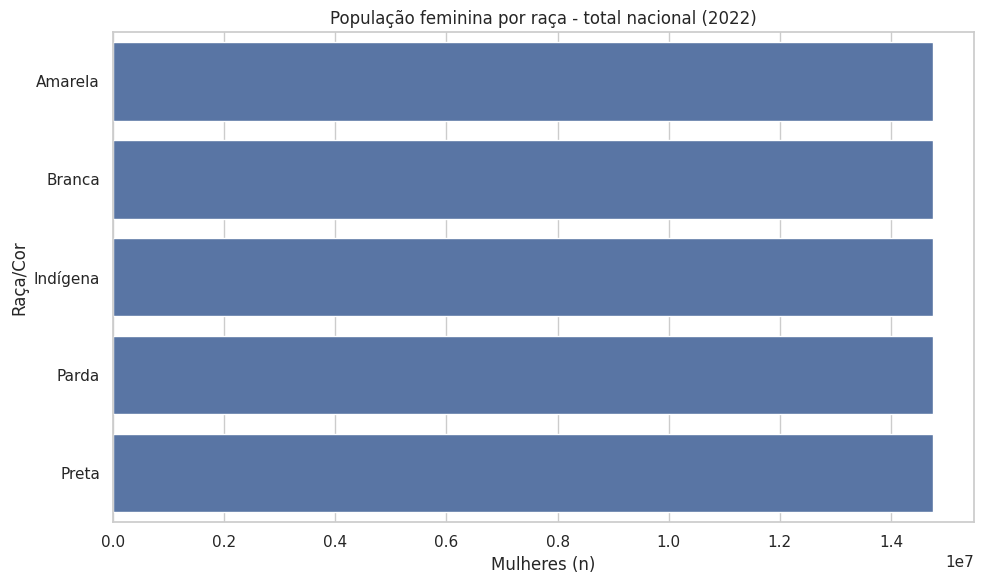

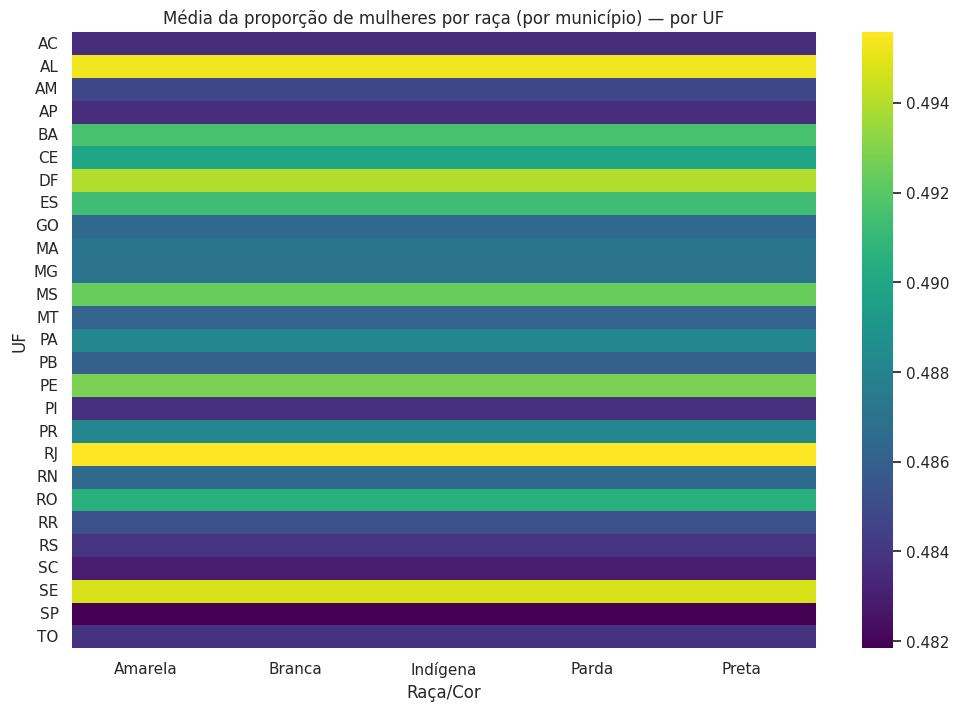

In [21]:
# Visualizações simples (matplotlib / seaborn)
# 1) Barras - população feminina por raça (nacional)
plt.figure(figsize=(10,6))
sns.barplot(data=agg_raca, x='populacao_mulheres', y='cor_raca')
plt.title('População feminina por raça - total nacional (2022)')
plt.xlabel('Mulheres (n)')
plt.ylabel('Raça/Cor')
plt.tight_layout()
plt.show()

# 2) Heatmap rápido: média de pct_mulheres_no_mun por UF x raça
pivot = df.pivot_table(index='sigla_uf', columns='cor_raca', values='pct_mulheres_no_mun', aggfunc='mean').fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=False, cmap='viridis')
plt.title('Média da proporção de mulheres por raça (por município) — por UF')
plt.xlabel('Raça/Cor')
plt.ylabel('UF')
plt.show()